In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as pt
import warnings
warnings.filterwarnings("ignore")


Now let’s use the panda’s data frame to load the dataset and look at the first five rows of it.

In [46]:
df = pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Now, we can observe the data and its shape(rows x columns)

This dataset contains 1338 data points with 6 independent features and 1 target feature(charges).

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


From the above, we can see that the dataset contains 2 columns with float values 3 with categorical values and the rest contains integer values.

In [48]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


We can look at the descriptive statistical measures of the continuous data available in the dataset.

#Exploratory Data Analysis
EDA is an approach to analyzing the data using visual techniques. It is used to discover trends, and patterns, or to check assumptions with the help of statistical summaries and graphical representations. While performing the EDA of this dataset we will try to look at what is the relation between the independent features that is how one affects the other.

In [49]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


So, here we can conclude that there are no null values in the dataset given.

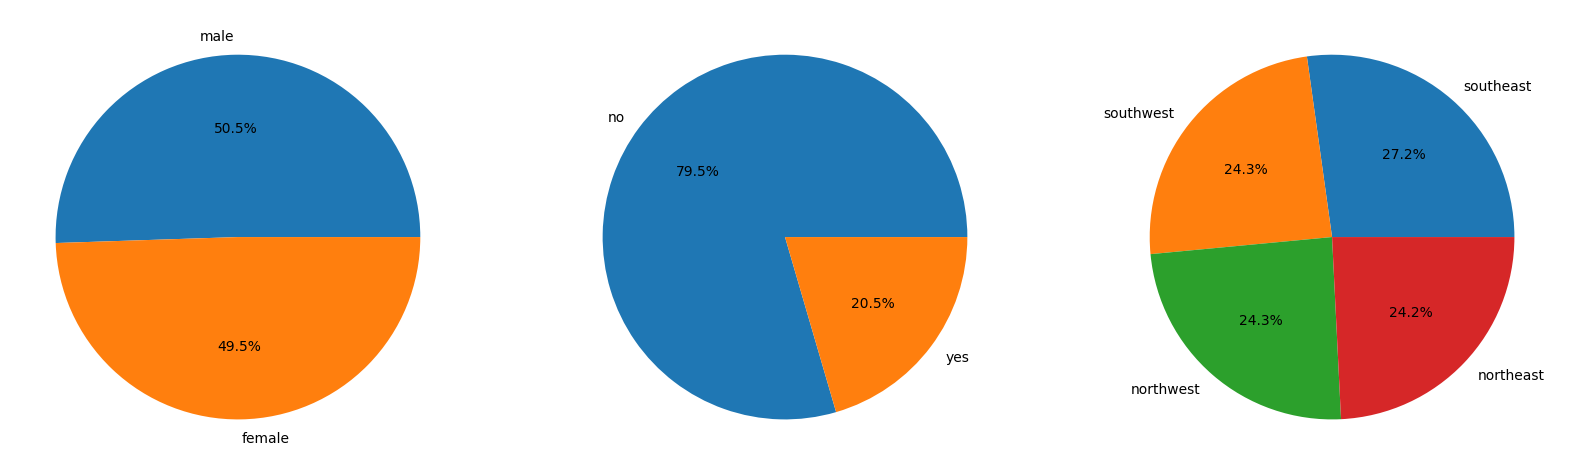

In [50]:
import matplotlib.pyplot as plt
features = ['sex', 'smoker', 'region']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(1, 3, i + 1)

    x = df[col].value_counts()
    plt.pie(x.values,
            labels=x.index,
            autopct='%1.1f%%')

plt.show()

# This code is modified by Susobhan Akhuli


The data provided to us is equally distributed among the sex and the region columns but in the smoker column, we can observe a ratio of 80:20.

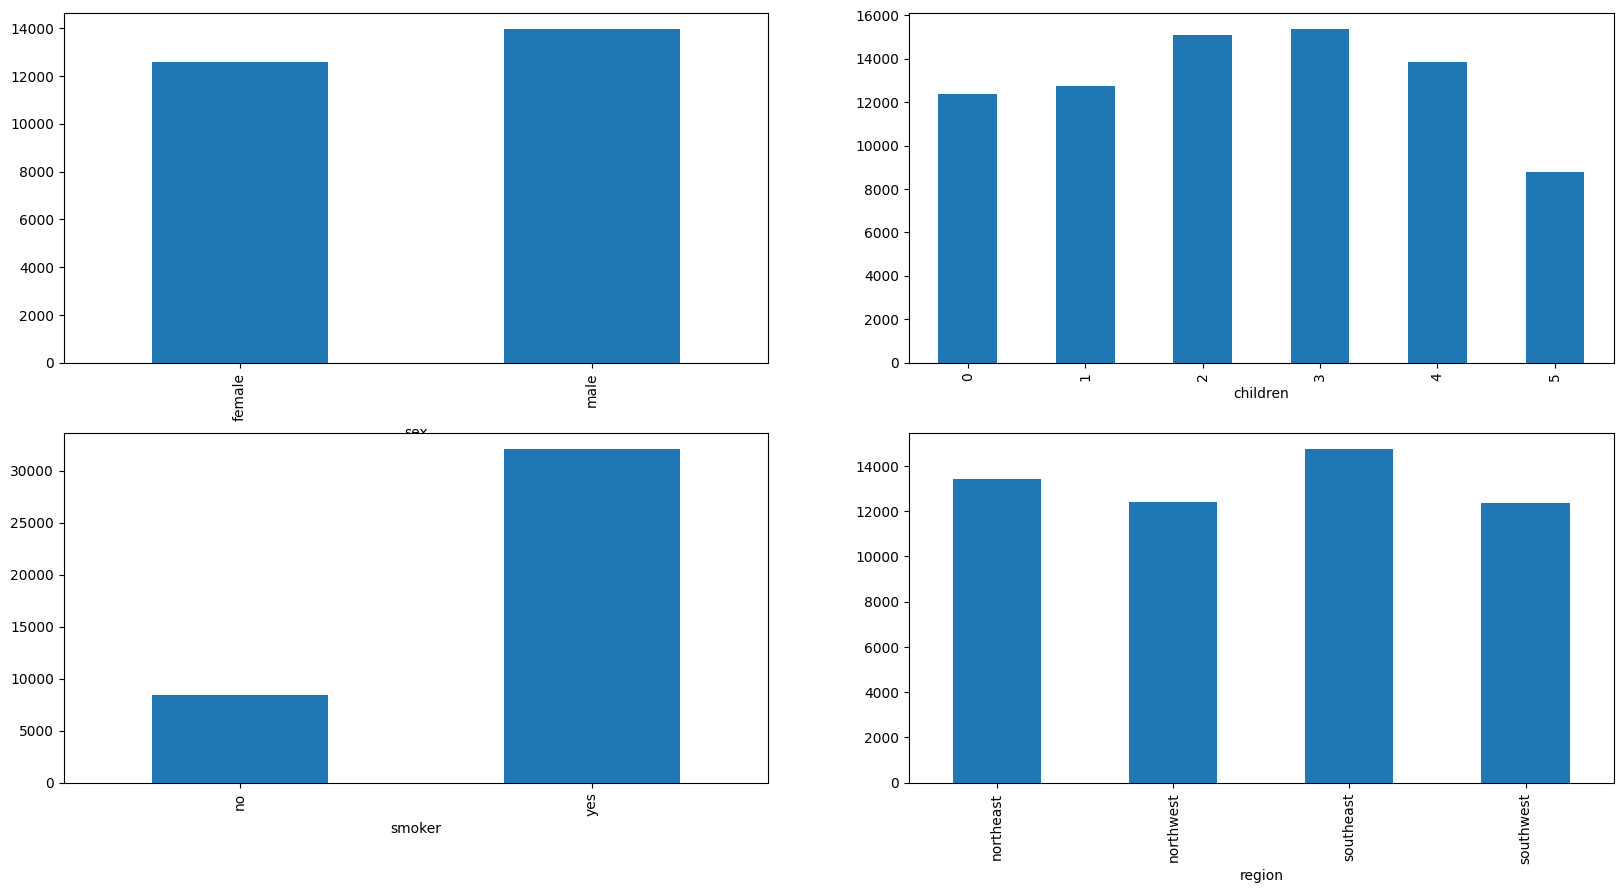

In [51]:
features = ['sex', 'children', 'smoker', 'region']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    df.groupby(col)['charges'].mean().astype(float).plot.bar()
plt.show()

# This code is modified by Susobhan Akhuli


Now let’s look at some of the observations which are shown in the above graphs:

Charges are on the higher side for males as compared to females but the difference is not that much.
Premium charged from the smoker is around thrice that which is charged from non-smokers.
Charges are approximately the same in the given four regions.

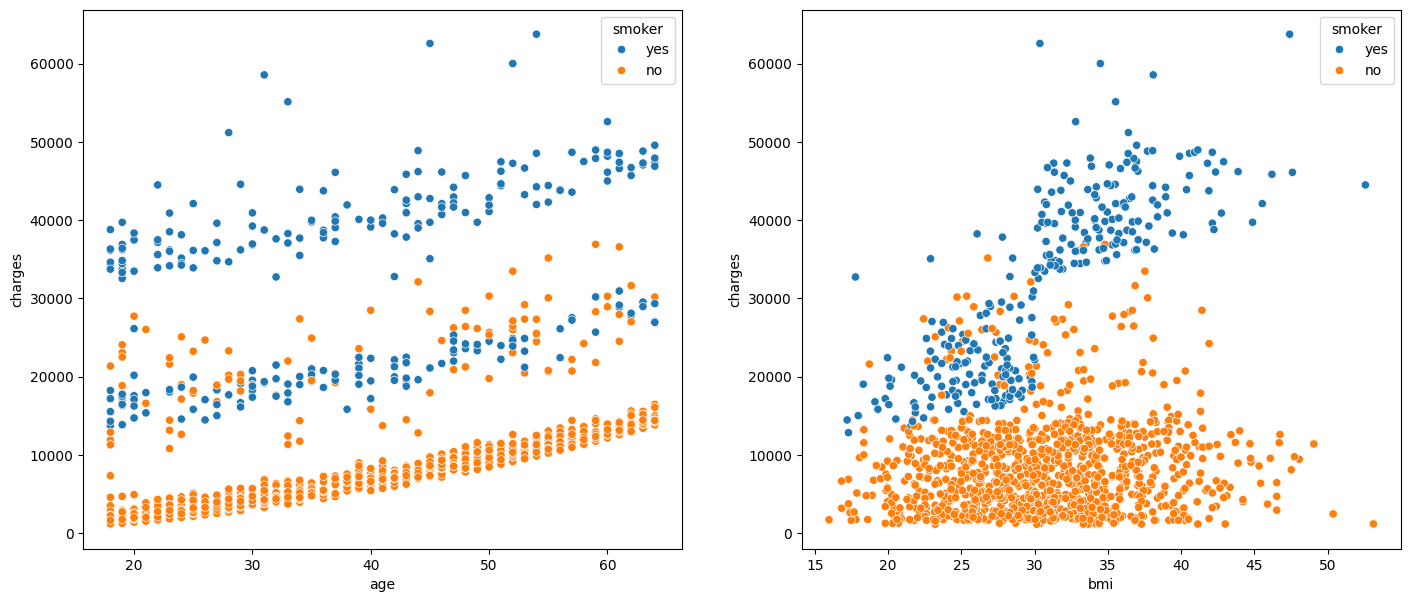

In [52]:
import seaborn as sns

features = ['age', 'bmi']

plt.subplots(figsize=(17, 7))
for i, col in enumerate(features):
    plt.subplot(1, 2, i + 1)
    sns.scatterplot(data=df, x=col,
                   y='charges',
                   hue='smoker')
plt.show()

# This code is modified by Susobhan Akhuli


A clear distinction can be observed here between the charges that smokers have to pay. Also here as well we can observe that as the age of a person increases premium prices goes up as well.

#DATA PREPROCESSING

Data preprocessing is technique to clean the unusual data like the missing values,wrong data,wrong format of data,duplicated data and the outliers.In this data we can observe that there are no missing values and wrong data.The only thing we can need to check is for duplicates and presence of outliers.

<Axes: ylabel='age'>

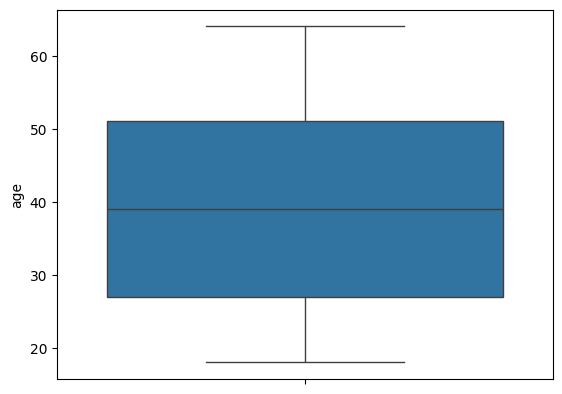

In [53]:
df.drop_duplicates(inplace=True)
sns.boxplot(df['age'])

we can see that there are no outliers present in age column

<Axes: ylabel='bmi'>

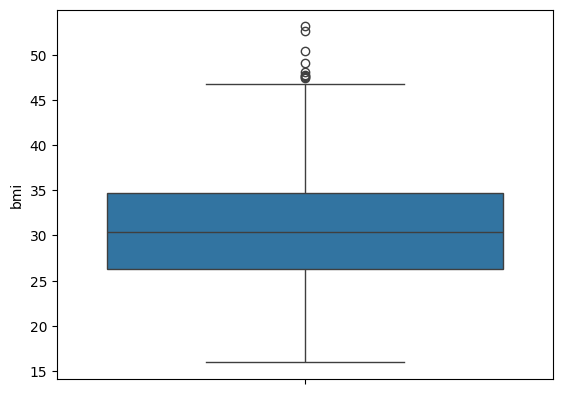

In [54]:
sns.boxplot(df['bmi'])

Due to the presence of outliers present in bmi column we need to treat the outliers by replacing the values with mean as the bmi column consists of continuous data.

In [55]:
Q1=df['bmi'].quantile(0.25)
Q2=df['bmi'].quantile(0.5)
Q3=df['bmi'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)

13.674999999999994
47.31500000000001


<Axes: ylabel='bmi'>

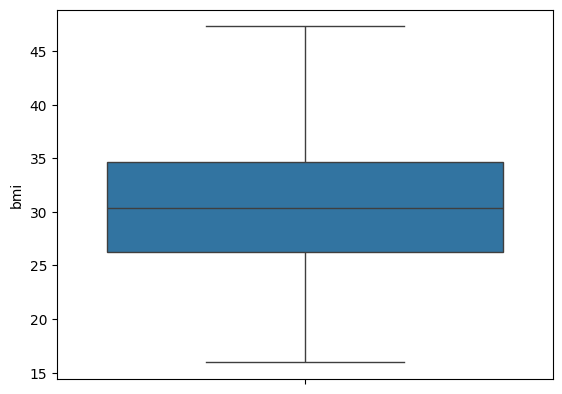

In [56]:
!pip install feature_engine
from feature_engine.outliers import ArbitraryOutlierCapper
arb=ArbitraryOutlierCapper(min_capping_dict={'bmi':13.6749},max_capping_dict={'bmi':47.315})
df[['bmi']]=arb.fit_transform(df[['bmi']])
sns.boxplot(df['bmi'])

# This code is modified by Susobhan Akhuli


Now we successfully treated the outliers .

#Data Wrangling

Data wrangling is a technique to ensure whether the data follow normal or standard distribution and encode the discrete data for prediction.

In [57]:
df['bmi'].skew()
df['age'].skew()


0.054780773126998195

Data in both the age and BMI column approximately follow a Normal distribution which is a good point with respect to the model’s learning.

#Encoding

encoding is to be done for discrete categorical data (sex,bmi,region).

In [58]:
df['sex']=df['sex'].map({'male':0,'female':1})
df['smoker']=df['smoker'].map({'yes':1,'no':0})
df['region']=df['region'].map({'northwest':0, 'northeast':1,'southeast':2,'southwest':3})


Now the discrete data is encoded and the data preprocessing and data wrangling part is completed.Now we can go for model development.

In [59]:
df.corr()


,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.019814,0.111998,0.041536,-0.025587,0.001771,0.298308
sex,0.019814,1.000000,-0.044831,-0.017848,-0.076596,-0.008998,-0.058044
bmi,0.111998,-0.044831,1.000000,0.013692,0.003151,0.156937,0.199063
children,0.041536,-0.017848,0.013692,1.000000,0.007331,-0.002842,0.067389
smoker,-0.025587,-0.076596,0.003151,0.007331,1.000000,0.012736,0.787234
region,0.001771,-0.008998,0.156937,-0.002842,0.012736,1.000000,0.010767
charges,0.298308,-0.058044,0.199063,0.067389,0.787234,0.010767,1.000000


#Model Development
There are so many state-of-the-art ML models available in academia but some model fits better to some problem while some fit better than other. So, to make this decision we split our data into training and validation data. Then we use the validation data to choose the model with the highest performance.

In [60]:
X=df.drop(['charges'],axis=1)
Y=df[['charges']]
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
l1=[]
l2=[]
l3=[]
cvs=0
for i in range(40,50):
 xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=i)
 lrmodel=LinearRegression()
 lrmodel.fit(xtrain,ytrain)
 l1.append(lrmodel.score(xtrain,ytrain))
 l2.append(lrmodel.score(xtest,ytest))
 cvs=(cross_val_score(lrmodel,X,Y,cv=5,)).mean()
 l3.append(cvs)
 df1=pd.DataFrame({'train acc':l1,'test acc':l2,'cvs':l3})
 df1

# This code is modified by Susobhan Akhuli


After dividing the data into training and validation data it is considered a better practice to achieve stable and fast training of the model.We have identified the best random_state number for this data set as 42 .Now we fix this random_state and try with different ml algorithms for better score or accuracy.

Now let’s train some state-of-the-art machine learning models on the training data and then use the validation data for choosing the best out of them for prediction.

In [61]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=42)
lrmodel=LinearRegression()
lrmodel.fit(xtrain,ytrain)
print(lrmodel.score(xtrain,ytrain))
print(lrmodel.score(xtest,ytest))
print(cross_val_score(lrmodel,X,Y,cv=5,).mean())


0.7295415541376445
0.806239111557059
0.7470697972809902


In [62]:
from sklearn.metrics import r2_score
svrmodel=SVR()
svrmodel.fit(xtrain,ytrain)
ypredtrain1=svrmodel.predict(xtrain)
ypredtest1=svrmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain1))
print(r2_score(ytest,ypredtest1))
print(cross_val_score(svrmodel,X,Y,cv=5,).mean())


-0.10151474302536445
-0.1344454720199666
-0.10374591327267262


In [63]:
rfmodel=RandomForestRegressor(random_state=42)
rfmodel.fit(xtrain,ytrain)
ypredtrain2=rfmodel.predict(xtrain)
ypredtest2=rfmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain2))
print(r2_score(ytest,ypredtest2))
print(cross_val_score(rfmodel,X,Y,cv=5,).mean())
from sklearn.model_selection import GridSearchCV
estimator=RandomForestRegressor(random_state=42)
param_grid={'n_estimators':[10,40,50,98,100,120,150]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(xtrain,ytrain)
print(grid.best_params_)
rfmodel=RandomForestRegressor(random_state=42,n_estimators=120)
rfmodel.fit(xtrain,ytrain)
ypredtrain2=rfmodel.predict(xtrain)
ypredtest2=rfmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain2))
print(r2_score(ytest,ypredtest2))
print(cross_val_score(rfmodel,X,Y,cv=5,).mean())


0.9738163260247533
0.8819423353068565
0.8363637309718952
{'n_estimators': 120}
0.9746383984429655
0.8822009842175969
0.8367438097052858


In [64]:
gbmodel=GradientBoostingRegressor()
gbmodel.fit(xtrain,ytrain)
ypredtrain3=gbmodel.predict(xtrain)
ypredtest3=gbmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain3))
print(r2_score(ytest,ypredtest3))
print(cross_val_score(gbmodel,X,Y,cv=5,).mean())
from sklearn.model_selection import GridSearchCV
estimator=GradientBoostingRegressor()
param_grid={'n_estimators':[10,15,19,20,21,50],'learning_rate':[0.1,0.19,0.2,0.21,0.8,1]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(xtrain,ytrain)
print(grid.best_params_)
gbmodel=GradientBoostingRegressor(n_estimators=19,learning_rate=0.2)
gbmodel.fit(xtrain,ytrain)
ypredtrain3=gbmodel.predict(xtrain)
ypredtest3=gbmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain3))
print(r2_score(ytest,ypredtest3))
print(cross_val_score(gbmodel,X,Y,cv=5,).mean())


0.8931345821166041
0.9042558673604
0.8550739202921731
{'learning_rate': 0.2, 'n_estimators': 19}
0.8682397447116927
0.9017109716082661
0.8606041910125791


In [65]:
xgmodel=XGBRegressor()
xgmodel.fit(xtrain,ytrain)
ypredtrain4=xgmodel.predict(xtrain)
ypredtest4=xgmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain4))
print(r2_score(ytest,ypredtest4))
print(cross_val_score(xgmodel,X,Y,cv=5,).mean())
from sklearn.model_selection import GridSearchCV
estimator=XGBRegressor()
param_grid={'n_estimators':[10,15,20,40,50],'max_depth':[3,4,5],'gamma':[0,0.15,0.3,0.5,1]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(xtrain,ytrain)
print(grid.best_params_)
xgmodel=XGBRegressor(n_estimators=15,max_depth=3,gamma=0)
xgmodel.fit(xtrain,ytrain)
ypredtrain4=xgmodel.predict(xtrain)
ypredtest4=xgmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain4))
print(r2_score(ytest,ypredtest4))
print(cross_val_score(xgmodel,X,Y,cv=5,).mean())


0.9954123497009277
0.8548938035964966
0.8081253051757813
{'gamma': 0, 'max_depth': 3, 'n_estimators': 10}
0.869317352771759
0.9022461175918579
0.8607115387916565


From the above table we can observe that XGBoost is the best model.Now we need to identify the important features for predicting of charges.

In [66]:
feats=pd.DataFrame(data=grid.best_estimator_.feature_importances_,index=X.columns,columns=['Importance'])
feats


,Importance
age,0.038633
sex,0.000000
bmi,0.133449
children,0.011073
smoker,0.809626
region,0.007219


In [67]:
feats=pd.DataFrame(data=grid.best_estimator_.feature_importances_,index=X.columns,columns=['Importance'])
feats


,Importance
age,0.038633
sex,0.000000
bmi,0.133449
children,0.011073
smoker,0.809626
region,0.007219


In [68]:
df.drop(df[['sex','region']],axis=1,inplace=True)
Xf=df.drop(df[['charges']],axis=1)
X=df.drop(df[['charges']],axis=1)
xtrain,xtest,ytrain,ytest=train_test_split(Xf,Y,test_size=0.2,random_state=42)
finalmodel=XGBRegressor(n_estimators=15,max_depth=3,gamma=0)
finalmodel.fit(xtrain,ytrain)
ypredtrain4=finalmodel.predict(xtrain)
ypredtest4=finalmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain4))
print(r2_score(ytest,ypredtest4))
print(cross_val_score(finalmodel,X,Y,cv=5,).mean())


0.8691051602363586
0.9007425308227539
0.8606266975402832


#Save Model:

In [69]:
from pickle import dump
dump(finalmodel,open('insurancemodelf.pkl','wb'))


#Predict on new data:

In [71]:
new_data=pd.DataFrame({'age':19,'sex':'male','bmi':27.9,'children':0,'smoker':'yes','region':'northeast'},index=[0])
new_data['smoker']=new_data['smoker'].map({'yes':1,'no':0})
new_data=new_data.drop(new_data[['sex','region']],axis=1)
finalmodel.predict(new_data)


array([18035.828], dtype=float32)

#Conclusion
Out of all the models XGBoost model is giving the highest accuracy this means predictions made by this model are close to the real values as compared to the other model.

The dataset we have used here was small still the conclusion we drew from them were quite similar to what is observed in the real-life scenario. If we would have a bigger dataset then we will be able to learn even deeper patterns in the relation between the independent features and the premium charged from the buyers.